In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from glob import glob

In [16]:
filenames = glob('../Games CSV/ Games Data*.csv')
dataframe_list = [pd.read_csv(f) for f in filenames]

In [17]:
all_data_df = pd.concat(dataframe_list)

In [18]:
all_data_df.head()

,Timestamp,Game Rank,Game,Giantbomb ID,Total Viewers,Total Channels
0,2018-10-04 21:27,1,Fortnite,37030,201354,15494
1,2018-10-04 21:27,2,League of Legends,24024,88663,2449
2,2018-10-04 21:27,3,Sports & Fitness,0,81293,19
3,2018-10-04 21:27,4,Just Chatting,0,57709,539
4,2018-10-04 21:27,5,Assassin's Creed Odyssey,68771,45258,346


In [19]:
all_data_by_game = all_data_df.sort_values(['Total Viewers','Game'], ascending=False)

In [20]:
all_data_by_game.head()

,Timestamp,Game Rank,Game,Giantbomb ID,Total Viewers,Total Channels
0,2018-10-10 10:19,1,League of Legends,24024,525265,1851
0,2018-10-10 08:19,1,League of Legends,24024,410365,1405
0,2018-10-11 08:19,1,League of Legends,24024,409008,1311
0,2018-10-05 17:19,1,Fortnite,37030,405749,15692
0,2018-10-05 18:19,1,Fortnite,37030,400185,15584


In [21]:
#Data Analysis
datagroup = all_data_df.groupby('Game')
data_means_df = datagroup.mean()
data_means_df.sort_values("Total Viewers", ascending=False).head()

,Game Rank,Giantbomb ID,Total Viewers,Total Channels
Game,,,,
Fortnite,1.333333,37030.0,158288.388889,9988.642857
League of Legends,1.746032,24024.0,144432.111111,2107.587302
Sports & Fitness,3.000000,0.0,81293.000000,19.000000
Call of Duty: Black Ops 4,9.600000,66897.0,61316.466667,392.866667
Just Chatting,4.658730,0.0,51420.714286,552.277778


In [22]:
top_10_df = data_means_df.reset_index(level="Game")
top_10_df_sorted = top_10_df.sort_values("Total Viewers", ascending=False)
top_10_df_sorted.head(10)

,Game,Game Rank,Giantbomb ID,Total Viewers,Total Channels
39,Fortnite,1.333333,37030.0,158288.388889,9988.642857
57,League of Legends,1.746032,24024.0,144432.111111,2107.587302
104,Sports & Fitness,3.000000,0.0,81293.000000,19.000000
12,Call of Duty: Black Ops 4,9.600000,66897.0,61316.466667,392.866667
54,Just Chatting,4.658730,0.0,51420.714286,552.277778
43,Garry's Mod,9.000000,20617.0,51376.333333,44.333333
95,ShellShock Live,11.000000,49235.0,43882.000000,9.000000
27,Dota 2,6.349206,32887.0,42061.015873,596.960317
135,World of Warcraft,6.325397,19783.0,39185.111111,1243.119048
6,Assassin's Creed Odyssey,7.809524,68771.0,38453.277778,644.333333


In [23]:
newdataframe = top_10_df_sorted.loc[top_10_df_sorted["Total Viewers"] >= 34000, :]
newdataframe


,Game,Game Rank,Giantbomb ID,Total Viewers,Total Channels
39,Fortnite,1.333333,37030.0,158288.388889,9988.642857
57,League of Legends,1.746032,24024.0,144432.111111,2107.587302
104,Sports & Fitness,3.000000,0.0,81293.000000,19.000000
12,Call of Duty: Black Ops 4,9.600000,66897.0,61316.466667,392.866667
54,Just Chatting,4.658730,0.0,51420.714286,552.277778
43,Garry's Mod,9.000000,20617.0,51376.333333,44.333333
95,ShellShock Live,11.000000,49235.0,43882.000000,9.000000
27,Dota 2,6.349206,32887.0,42061.015873,596.960317
135,World of Warcraft,6.325397,19783.0,39185.111111,1243.119048
6,Assassin's Creed Odyssey,7.809524,68771.0,38453.277778,644.333333


In [24]:
x_axis = newdataframe["Total Viewers"]
labels = newdataframe["Game"]
colors = ["Purple","Plum","Pink","Orchid"]

In [25]:
games_viewer_average = newdataframe[["Game","Total Viewers"]]
games_viewer_average.to_csv("games_viewer_average.csv")

<function matplotlib.pyplot.show(*args, **kw)>

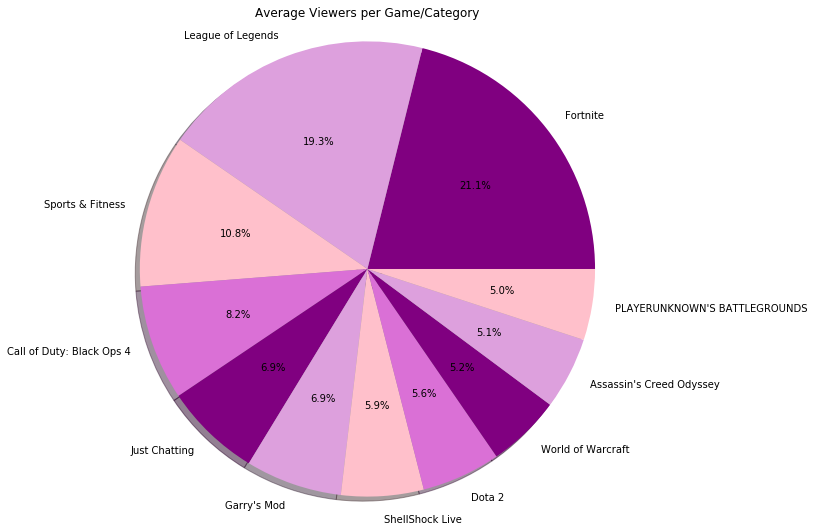

In [57]:
plt.pie(x_axis, labels=labels, startangle=0, colors=colors, shadow=True, autopct="%1.1f%%")
plt.title("Average Viewers per Game/Category")
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.savefig("Average Viewers per Game PieChart.png")
plt.show

In [56]:
plt.savefig("Average Viewers per Game PieChart.png")

<Figure size 432x288 with 0 Axes>

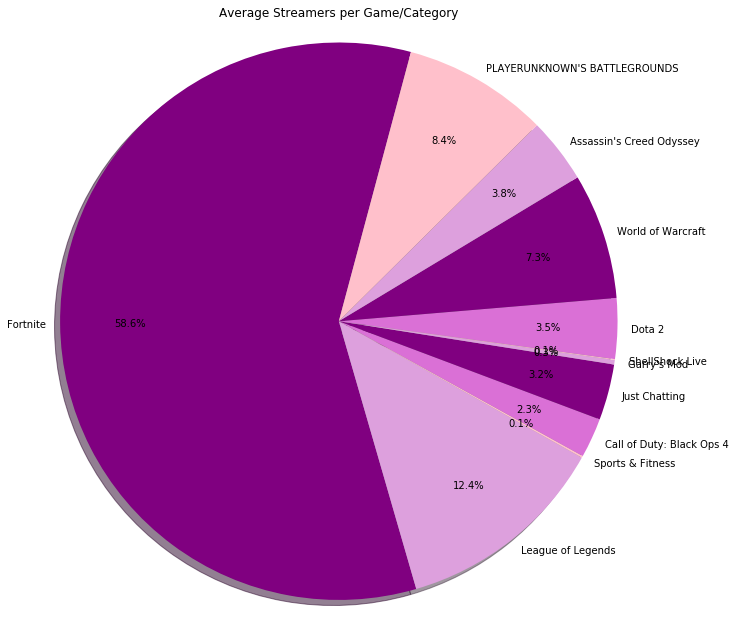

In [51]:
plt.pie(newdataframe["Total Channels"], labels=labels, startangle=75, colors=colors, shadow=True, rotatelabels=False, autopct="%1.1f%%", pctdistance = .75, labeldistance = 1.05)
plt.title("Average Streamers per Game/Category")
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.show
plt.savefig("Average Streamers per Game PieChart.png")

In [ ]:
plt.savefig("Average Streamers per Game PieChart.png")